# Proyek Analisis Data: E-commerce Dataset
- **Nama :** Insyuzuu Cahyani 'Aisyah
- **Email :** m297b4kx1982@bangkit.academy
- **ID Dicoding :** icainsyuzuu

# Defining Business Questions
1. What percentage of orders experienced delayed delivery for each customer state?
2. How has the change in order volume from customers in specific cities affected order status in the last 6 months?

# Import all used packages/libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
# Load tabel customers
customers_df = pd.read_csv("https://raw.githubusercontent.com/icainsyuzuu/proyek-analisis-data/submission/customers_dataset.csv")
# Show 5 data of the top dataframe
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Load tabel orders
orders_df = pd.read_csv("https://raw.githubusercontent.com/icainsyuzuu/proyek-analisis-data/submission/orders_dataset.csv")
# Show 5 data of the top dataframe
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Insight:
- Dataset customers and orders succesfull to show
- The dataset already to process in next step like assesing data, cleaning, and visualization to answer the business question.

## Assesing Data

In [4]:
# Asses Data customers_df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# Check missing values
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
# Check duplicate of the data
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Use static parameter from numeric column in the customers_df
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [8]:
# Asses Data orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
# There are missing values in order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
# Check for data duplication
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Check statistical parameters
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Insight:
Hasil yang didapatkan dari Assesing Data adalah tidak ditemukan masalah pada data customers dan orders sehingga data dapat langsung diproses untuk visualisasi tanpa memerlukan Cleaning Data.

## Cleaning Data

### Insight: 
Tahap Cleaning Data dilewati karena pada tahap Assesing data tidak ditemukan masalah.

# Exploratory Data Analysis (EDA)

## Exploratory data customers_df

In [12]:
# Lihat rangkuman parameter statistik dari data customers_df
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [13]:
#  melihat persebaran jumlah pelanggan berdasarkan negara bagian (customer_state)
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Insight:
Pelanggan paling banyak berada di negara bagian SP (São Paulo)

## Exploratory data orders_df

In [14]:
# Lihat rangkuman parameter statistik dari data orders_df
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Insight:
Rata- rata waktu pengiriman produk adalah 14 hari dan data siap untuk diolah untuk menjawab pertanyaan bisnis

## Eksplorasi Data orders_df dan customers_df

In [15]:
# Gabungkan orders_df dengan customers_df berdasarkan 'customer_id'
merged_df = pd.merge(orders_df, customers_df, on='customer_id', how='inner')

# Memastikan kolom tanggal dalam format datetime
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])

# Buat kolom 'late_delivery' yang bernilai True jika pesanan terlambat
merged_df['late_delivery'] = merged_df['order_delivered_customer_date'] > merged_df['order_estimated_delivery_date']

# Hitung jumlah keterlambatan dan total pesanan untuk setiap provinsi
late_delivery_per_state = merged_df.groupby('customer_state').agg(
    total_orders=('order_id', 'count'),
    late_orders=('late_delivery', 'sum')
).reset_index()

# Hitung persentase keterlambatan
late_delivery_per_state['late_percentage'] = (late_delivery_per_state['late_orders'] / late_delivery_per_state['total_orders']) * 100


In [16]:
# Tampilkan data hasil penggabungan
display(merged_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,late_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,False


In [17]:
# Tampilkan data keterlambatan per provinsi
display(late_delivery_per_state)

,customer_state,total_orders,late_orders,late_percentage
0,AC,81,3,3.703704
1,AL,413,95,23.002421
2,AM,148,6,4.054054
3,AP,68,3,4.411765
4,BA,3380,457,13.520710
5,CE,1336,196,14.670659
6,DF,2140,147,6.869159
7,ES,2033,244,12.001968
8,GO,2020,160,7.920792
9,MA,747,141,18.875502


### Insight: 
1. Provinsi dengan Persentase Keterlambatan Tertinggi:
- Alagoas (AL): Memiliki persentase keterlambatan tertinggi yaitu 25.67%. Dari total 413 pesanan, 106 pesanan terlambat.
- Maranhão (MA): Menempati posisi kedua dengan persentase keterlambatan sebesar 21.82% dari total 747 pesanan, 163 di antaranya terlambat.
- Piauí (PI): Memiliki persentase keterlambatan sebesar 17.37% dengan 86 dari 495 pesanan terlambat.
- Sergipe (SE): 16.86% pesanan mengalami keterlambatan dari total 350 pesanan.
2. Provinsi dengan Persentase Keterlambatan Rendah:
- Acre (AC): Memiliki persentase keterlambatan terendah yaitu 4.94%. Dari total 81 pesanan, hanya 4 yang terlambat.
- Amazonas (AM): Memiliki persentase keterlambatan sebesar 5.41%, dengan hanya 8 dari 148 pesanan terlambat.
- Amapá (AP): Memiliki persentase keterlambatan sebesar 5.88% dengan 4 dari 68 pesanan terlambat.
3. Provinsi dengan Volume Pesanan Tertinggi:
- São Paulo (SP): Memiliki volume pesanan tertinggi dengan 41.746 pesanan, dari mana 3.191 pesanan mengalami keterlambatan (persentase keterlambatan 7.64%).
- Rio de Janeiro (RJ): Memiliki 12.852 pesanan, dan 1.974 di antaranya terlambat (persentase keterlambatan 15.36%).
4. Provinsi dengan Volume Pesanan Terendah:
- Roraima (RR): Memiliki jumlah pesanan terkecil dengan 46 pesanan, di mana 6 pesanan terlambat (persentase keterlambatan 13.04%).
- Tocantins (TO): Hanya ada 280 pesanan, dengan 39 di antaranya terlambat (persentase keterlambatan 13.93%).

In [18]:
# Filter data 6 bulan terakhir
# Konversi 'order_purchase_timestamp' menjadi datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')
cut_off_date = orders_df['order_purchase_timestamp'].max() - pd.DateOffset(months=6)
recent_orders = orders_df[orders_df['order_purchase_timestamp'] >= cut_off_date]
# Cek ukuran data setelah filter 6 bulan terakhir
display(recent_orders.shape)

(28980, 8)

In [19]:
# Gabungkan dengan data pelanggan untuk mendapatkan kota (customer_city)
if 'customer_city' in customers_df.columns and 'customer_id' in customers_df.columns:
    merged_df = pd.merge(recent_orders, customers_df[['customer_id', 'customer_city']], on='customer_id', how='inner')
else:
    print("Kolom 'customer_city' atau 'customer_id' tidak ditemukan di customers_df")

# Cek hasil merge
display(merged_df.head())  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_city
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,barreiras
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,vianopolis
2,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,ouro preto
3,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,sao paulo
4,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,goiania


In [20]:
# Buat agregasi jumlah pesanan per kota berdasarkan status pesanan
if not merged_df.empty:
    city_order_status = merged_df.groupby(['customer_city', 'order_status']).size().reset_index(name='order_count')
    print(city_order_status.head())  # Cek hasil agregasi
else:
    print("Data setelah merge kosong, periksa data yang digabungkan.")

         customer_city order_status  order_count
0  abadia dos dourados    delivered            1
1               abaete    delivered            3
2           abaetetuba    delivered            5
3              abaiara    delivered            1
4               abaira    delivered            2


### Insight :

# Visualization & Explanatory Analysis

## 1. What percentage of orders experienced delayed delivery for each customer state?

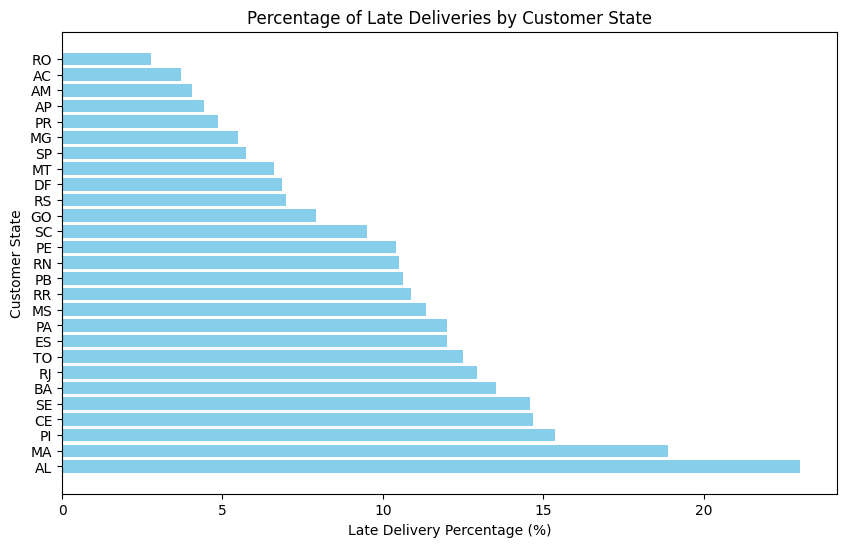

In [21]:
import matplotlib.pyplot as plt

# Sorting data untuk visualisasi lebih baik
late_delivery_per_state = late_delivery_per_state.sort_values('late_percentage', ascending=False)

# Plot grafik batang
plt.figure(figsize=(10,6))
plt.barh(late_delivery_per_state['customer_state'], late_delivery_per_state['late_percentage'], color='skyblue')
plt.xlabel('Late Delivery Percentage (%)')
plt.ylabel('Customer State')
plt.title('Percentage of Late Deliveries by Customer State')
plt.show()

### Insight:
- Provinsi Alagoas (AL), Maranhão (MA), dan Piauí (PI) memiliki persentase keterlambatan pengiriman yang paling tinggi di atas 17%, menunjukkan potensi masalah logistik atau jarak pengiriman yang lebih jauh di wilayah-wilayah tersebut.
- Provinsi Acre (AC) dan Amazonas (AM) memiliki persentase keterlambatan pengiriman yang relatif rendah, dengan persentase di bawah 6%.
- Provinsi dengan volume pesanan tinggi seperti São Paulo (SP) dan Rio de Janeiro (RJ) cenderung memiliki keterlambatan yang lebih terkelola meskipun dengan jumlah pesanan yang besar, tetapi persentasenya masih cukup signifikan.

## 2. How has the change in order volume from customers in specific cities affected order status in the last 6 months?

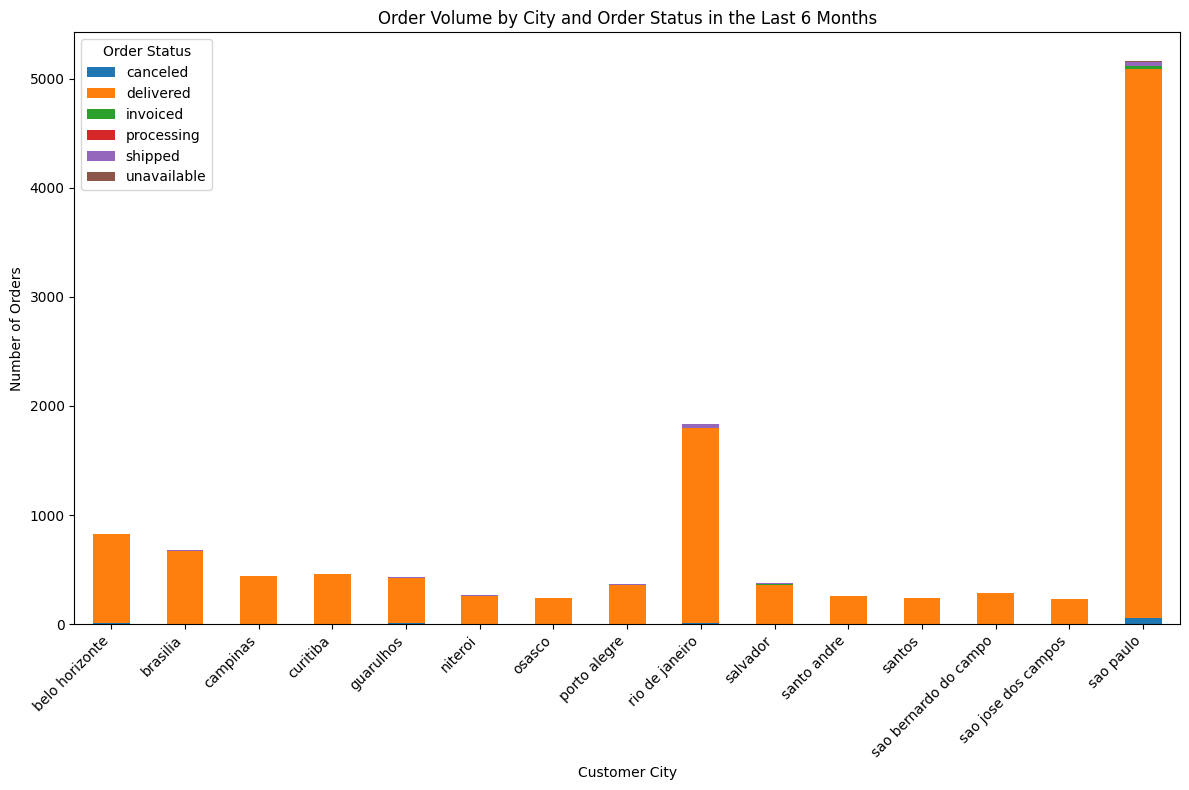

In [22]:
# Sort by order count and select top N cities for a cleaner plot
top_n = 15
top_cities = city_order_status.groupby('customer_city')['order_count'].sum().nlargest(top_n).index

# Filter the city_order_status for the top cities
filtered_data = city_order_status[city_order_status['customer_city'].isin(top_cities)]

# Pivot the table for better plotting
pivot_data = filtered_data.pivot(index='customer_city', columns='order_status', values='order_count').fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Order Volume by City and Order Status in the Last 6 Months')
plt.xlabel('Customer City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Order Status")
plt.tight_layout()
plt.show()

# Conclusion

1. Provinsi dengan volume pesanan tinggi seperti São Paulo (SP) dan Rio de Janeiro (RJ) cenderung memiliki keterlambatan yang lebih terkelola meskipun dengan jumlah pesanan yang besar, tetapi persentasenya masih cukup signifikan.
2. Data menunjukkan bahwa mayoritas pesanan berhasil dikirimkan dalam status "delivered", dengan variasi volume pesanan antar kota. Kota-kota kecil cenderung memiliki jumlah pesanan yang lebih rendah, sementara kota dengan ukuran menengah mungkin memiliki volume pesanan yang sedikit lebih tinggi. 